In [1]:
# %pip install pandas numpy scikit-learn matplotlib 

In [2]:
# %pip install -upgrade scikit-learn

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline

In [4]:
X,y=make_blobs(n_samples=1000, n_features=2, centers=3, shuffle=True, random_state=None)

In [5]:
X.shape

(1000, 2)

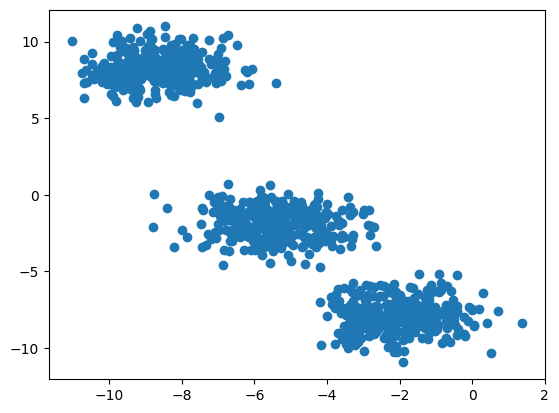

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [8]:
from sklearn.cluster import KMeans

as we know in K-mean clustering , find the correct K value is vary important to make the proper and accuracte clusters for that we will use the manual way which is called 
                            
                    Elbow method

In [9]:
wcss=[]
for k in range(1,11):
    print(f"training on k-value{k}")
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


training on k-value1
training on k-value2
training on k-value3
training on k-value4
training on k-value5
training on k-value6
training on k-value7
training on k-value8
training on k-value9
training on k-value10


In [10]:
wcss

[35593.316588790374,
 6382.472857300939,
 1349.376363914135,
 1183.66392583188,
 1027.6388930999112,
 908.2323187229091,
 803.228720197351,
 675.3273202822285,
 652.2199484375474,
 609.6084882608465]

Will make elbow curv to check the best K value

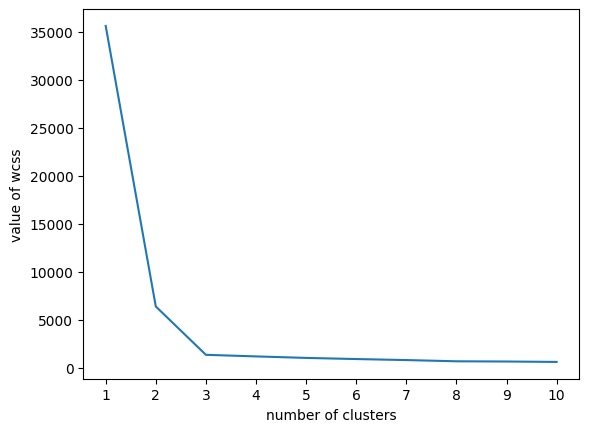

In [ ]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("value of wcss")
plt.show()

So in above graph we can easily see the elbow curv is at k=3

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_lebels=kmeans.fit_predict(X_train)

In [13]:
y_lebels

array([0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 1, 0, 1,
       1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 2,
       0, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 2,
       2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       0, 1, 1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       1, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       2, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,

lets check the clusters looks on predcited output

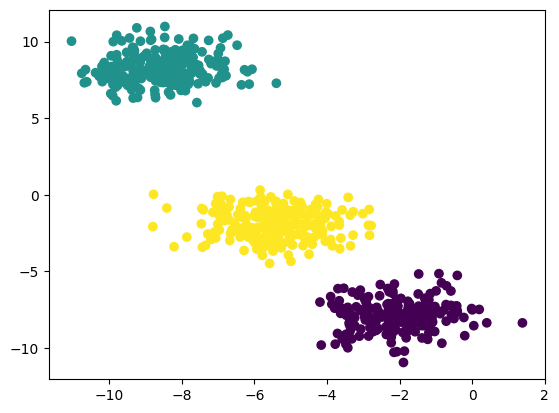

In [14]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lebels)

In [15]:
y_test_lebels=kmeans.predict(X_test)

Let check on test data is that categorized properly or the clustering is working properly

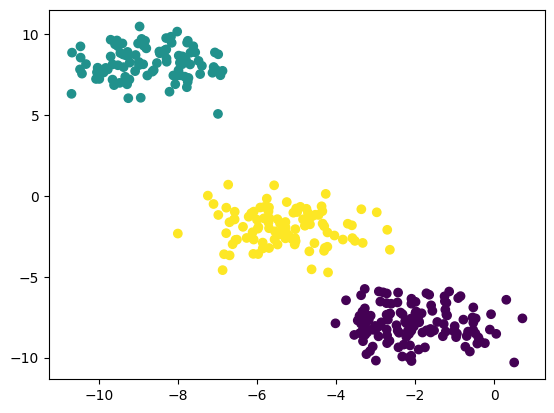

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_lebels)

know in above process we observe one thing is manual making elbow ,finding k value and if data points and in large valume then it will become headache so to solve this problem and make this manual process to automate there is one library called 

                           Knee automation

let see knee locator

In [17]:
# %pip install kneed 

In [18]:
from kneed import KneeLocator

In [20]:
KL=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [21]:
KL.elbow

np.int64(3)

So we can see it is also giving the value of k=3 

Now we will see performace validation using silhouette_score

In [22]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [25]:
silhouette_coefficients

[0.7380712556063779,
 0.772034811201767,
 0.5938083689178297,
 0.43095626458057906,
 0.3076202584479386,
 0.31766339923162656,
 0.3184214288623781,
 0.3478967483937555,
 0.32359346463442173]

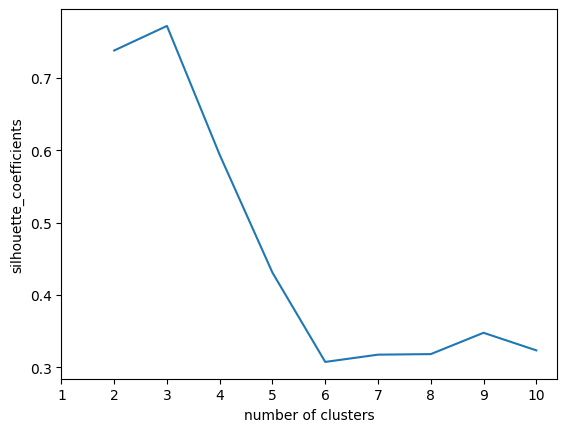

In [27]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("silhouette_coefficients")
plt.show()